# Why Diversity Leads to Better Decision-Making

A Jupyter notebook for the blog post [Why Diversity Leads to Better Decision-Making](https://www.jasongilbertson.com/why-diversity-leads-to-better-decision-making/). Note: This notebook has significantly less documentation than usual. See the blog post for context and definitions.

## Environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [2]:
def create_covariance_matrix(seed, dist):
    np.random.seed(seed)
    return np.array([
        [1.0, dist[0], dist[1], dist[2], dist[3]],
        [dist[4], 1.0, dist[5], dist[6], dist[7]],
        [dist[8], dist[9], 1.0, dist[10], dist[11]],
        [dist[12], dist[13], dist[14], 1.0, dist[15]],
        [dist[16], dist[17], dist[18], dist[19], 1.0]
    ])

## Team Diverse

### Constant Decision-Making Abilility: X = 50

In [3]:
np.random.seed(47)
team_diversity_correlations = np.random.normal(0, 1, 20)
team_diversity_correlations

array([-0.84800948,  1.30590636,  0.92420797,  0.6404118 , -1.05473698,
        1.79776072, -1.01278675,  0.82362332, -0.29465035, -0.59247057,
       -1.39372706,  1.10417967, -0.93234029, -0.94315644,  0.43660623,
        0.79495827,  0.71953315,  0.08766226, -1.32274841,  0.05179398])

In [4]:
print(team_diversity_correlations.mean(), team_diversity_correlations.std())

0.014600870236879693 0.9537220318473525


In [5]:
team_diversity_cov = create_covariance_matrix(47, team_diversity_correlations)
team_diversity_cov

array([[ 1.        , -0.84800948,  1.30590636,  0.92420797,  0.6404118 ],
       [-1.05473698,  1.        ,  1.79776072, -1.01278675,  0.82362332],
       [-0.29465035, -0.59247057,  1.        , -1.39372706,  1.10417967],
       [-0.93234029, -0.94315644,  0.43660623,  1.        ,  0.79495827],
       [ 0.71953315,  0.08766226, -1.32274841,  0.05179398,  1.        ]])

In [6]:
np.random.seed(47)
team_diversity_output = np.random.multivariate_normal(mean = [50., 50., 50., 50., 50.], cov = team_diversity_cov, size = 10000)
team_diversity_df = pd.DataFrame(data = team_diversity_output, columns = ['diverse_1', 'diverse_2', 'diverse_3', 'diverse_4', 'diverse_5']) \
    .assign(diverse_scenario_1 = lambda df: df.mean(axis = 1))

team_diversity_df.describe()

/var/folders/bs/znxrs1_x46lbxw_9njx6nnwm0000gp/T/ipykernel_1796/2881751359.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  team_diversity_output = np.random.multivariate_normal(mean = [50., 50., 50., 50., 50.], cov = team_diversity_cov, size = 10000)


,diverse_1,diverse_2,diverse_3,diverse_4,diverse_5,diverse_scenario_1
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.994266,50.002090,49.999666,49.980295,50.006156,49.996495
std,1.322467,1.253414,1.654917,1.445107,1.368054,0.540393
min,45.333351,45.193322,43.998587,43.907434,45.094848,47.791444
25%,49.119469,49.151772,48.895719,49.011450,49.068758,49.634323
50%,50.011951,50.005326,50.005311,49.981976,50.002105,49.995419
75%,50.880055,50.831344,51.120209,50.964855,50.927398,50.362709
max,55.293963,54.511071,56.721288,55.323465,55.426406,51.975852


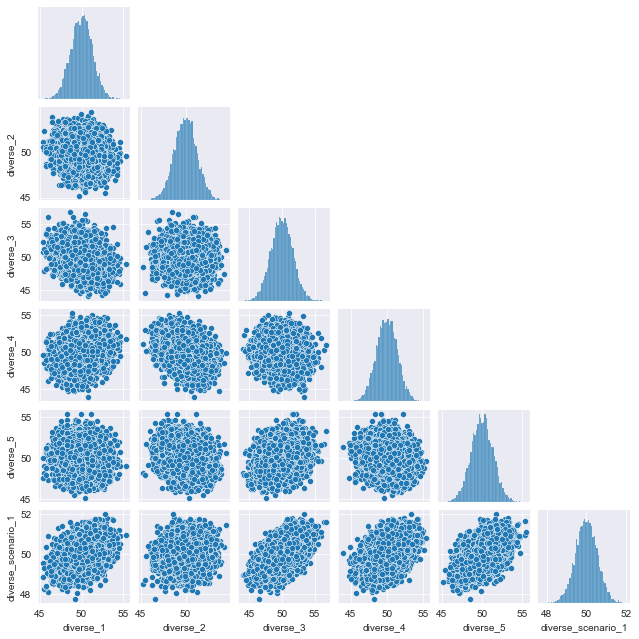

In [7]:
sns.pairplot(team_diversity_df, height = 1.5, corner = True)

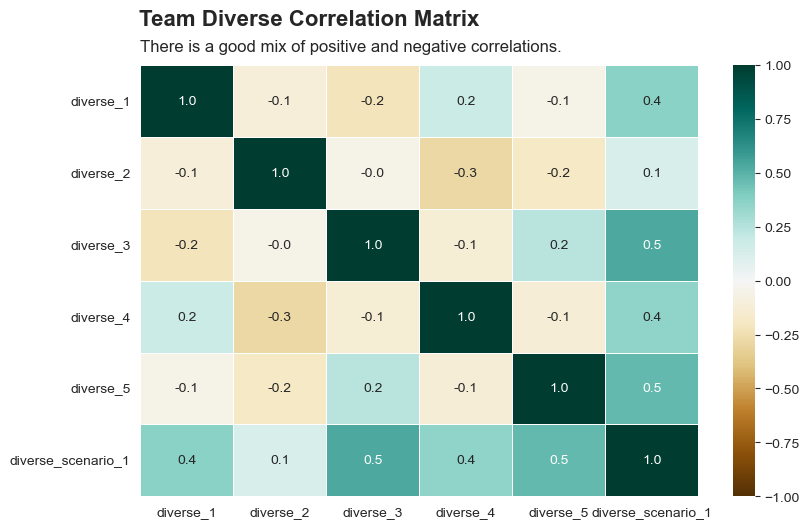

In [8]:
plt.figure(figsize=(9, 5.6))

sns.heatmap(team_diversity_df.corr(), annot=True, fmt='.1f', linewidths=.5, vmin=-1, center=0, vmax=1, cmap='BrBG')
plt.suptitle('Team Diverse Correlation Matrix', x=0.313, fontsize=16, fontweight='bold')
plt.title('There is a good mix of positive and negative correlations.', fontsize=12, loc='left', pad=10)

plt.savefig('team_diverse.png', bbox_inches='tight', dpi=300)

### Variable Decision-Making Ability: X = {40, 50, 50, 60, 75}

In [9]:
np.random.seed(47)
team_diversity_variable_output = np.random.multivariate_normal(mean = [40., 50., 50., 60., 75.], cov = team_diversity_cov, size = 10000)
team_diversity_variable_df = pd.DataFrame(data = team_diversity_variable_output, columns = ['diverse_1', 'diverse_2', 'diverse_3', 'diverse_4', 'diverse_5']) \
    .assign(diverse_scenario_2 = lambda df: df.mean(axis = 1))

team_diversity_variable_df.describe()

/var/folders/bs/znxrs1_x46lbxw_9njx6nnwm0000gp/T/ipykernel_1796/1695487503.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  team_diversity_variable_output = np.random.multivariate_normal(mean = [40., 50., 50., 60., 75.], cov = team_diversity_cov, size = 10000)


,diverse_1,diverse_2,diverse_3,diverse_4,diverse_5,diverse_scenario_2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.994266,50.002090,49.999666,59.980295,75.006156,54.996495
std,1.322467,1.253414,1.654917,1.445107,1.368054,0.540393
min,35.333351,45.193322,43.998587,53.907434,70.094848,52.791444
25%,39.119469,49.151772,48.895719,59.011450,74.068758,54.634323
50%,40.011951,50.005326,50.005311,59.981976,75.002105,54.995419
75%,40.880055,50.831344,51.120209,60.964855,75.927398,55.362709
max,45.293963,54.511071,56.721288,65.323465,80.426406,56.975852


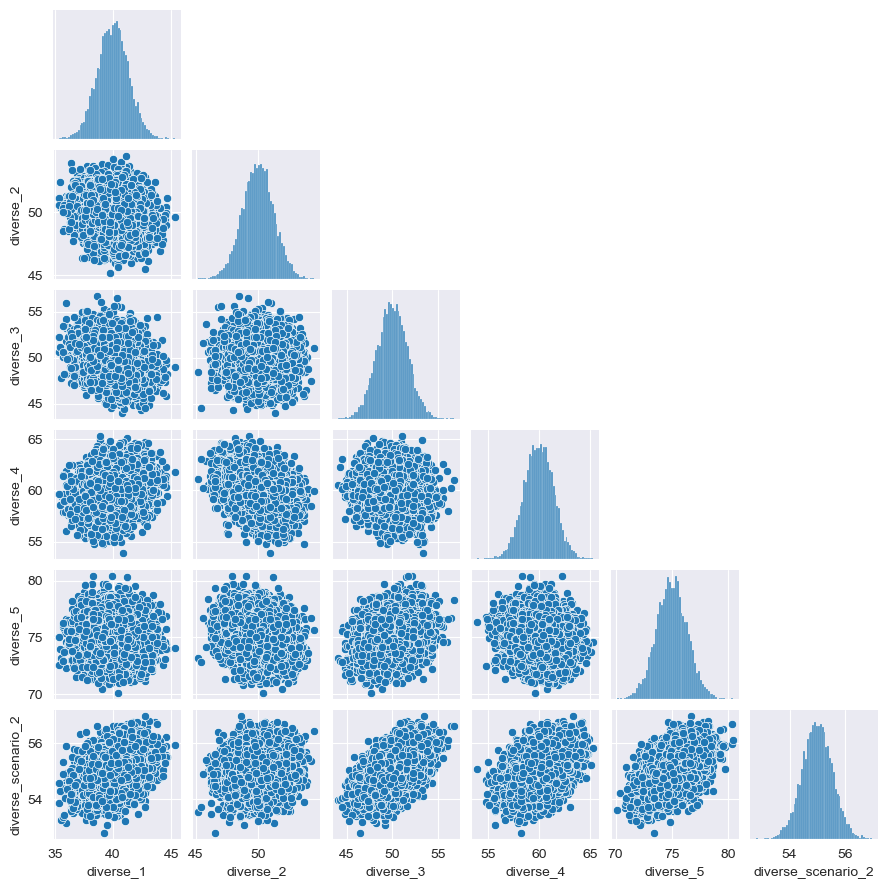

In [10]:
sns.pairplot(team_diversity_variable_df, height = 1.5, corner = True)

## Team Boring

### Constant Decision-Making Ability: X = 50

In [11]:
np.random.seed(47)
team_boring_correlations = np.random.normal(0.5, 1, 20)
team_boring_correlations

array([-0.34800948,  1.80590636,  1.42420797,  1.1404118 , -0.55473698,
        2.29776072, -0.51278675,  1.32362332,  0.20534965, -0.09247057,
       -0.89372706,  1.60417967, -0.43234029, -0.44315644,  0.93660623,
        1.29495827,  1.21953315,  0.58766226, -0.82274841,  0.55179398])

In [12]:
print(team_boring_correlations.mean(), team_boring_correlations.std())

0.5146008702368798 0.9537220318473525


In [13]:
team_boring_cov = create_covariance_matrix(47, team_boring_correlations)
team_boring_cov

array([[ 1.        , -0.34800948,  1.80590636,  1.42420797,  1.1404118 ],
       [-0.55473698,  1.        ,  2.29776072, -0.51278675,  1.32362332],
       [ 0.20534965, -0.09247057,  1.        , -0.89372706,  1.60417967],
       [-0.43234029, -0.44315644,  0.93660623,  1.        ,  1.29495827],
       [ 1.21953315,  0.58766226, -0.82274841,  0.55179398,  1.        ]])

In [14]:
np.random.seed(47)
team_boring_output = np.random.multivariate_normal(mean = [50., 50., 50., 50., 50.], cov = team_boring_cov, size = 10000)
team_boring_df = pd.DataFrame(data = team_boring_output, columns = ['boring_1', 'boring_2', 'boring_3', 'boring_4', 'boring_5']) \
    .assign(boring_scenario_1 = lambda df: df.mean(axis = 1))

team_boring_df.describe()

/var/folders/bs/znxrs1_x46lbxw_9njx6nnwm0000gp/T/ipykernel_1796/1255040011.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  team_boring_output = np.random.multivariate_normal(mean = [50., 50., 50., 50., 50.], cov = team_boring_cov, size = 10000)


,boring_1,boring_2,boring_3,boring_4,boring_5,boring_scenario_1
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.006618,49.990757,49.993057,50.011309,49.986295,49.997607
std,1.267815,1.092259,1.759905,1.396170,1.605001,0.778399
min,45.108942,45.498646,43.758545,43.790468,44.412654,46.905856
25%,49.154199,49.249537,48.793035,49.060603,48.901862,49.476046
50%,50.012845,50.003060,49.996405,50.006985,49.968250,49.995601
75%,50.840840,50.722334,51.184043,50.945164,51.072550,50.525566
max,55.114427,54.002814,58.432864,55.320740,55.850604,52.781576


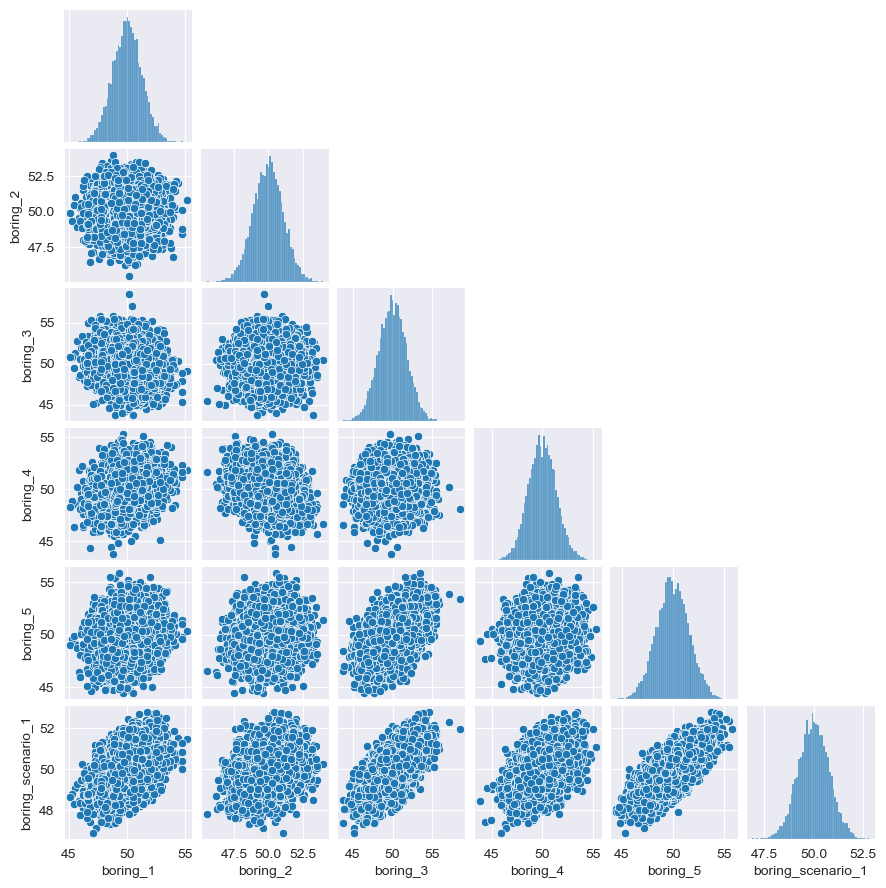

In [15]:
sns.pairplot(team_boring_df, height = 1.5, corner = True)

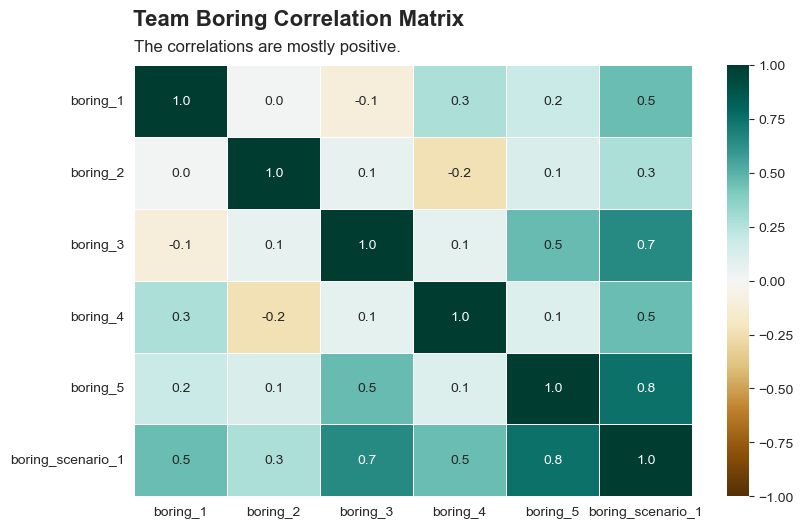

In [16]:
plt.figure(figsize=(9, 5.6))

sns.heatmap(team_boring_df.corr(), annot=True, fmt='.1f', linewidths=.5, vmin=-1, center=0, vmax=1, cmap='BrBG')
plt.suptitle('Team Boring Correlation Matrix', x=0.308, fontsize=16, fontweight='bold')
plt.title('The correlations are mostly positive.', fontsize=12, loc='left', pad=10)

plt.savefig('team_boring.png', bbox_inches='tight', dpi=300)

### Variable Decision-Making Ability: X = {30, 40, 50, 50, 70}

In [17]:
np.random.seed(47)
team_boring_variable_output = np.random.multivariate_normal(mean = [30., 40., 50., 50., 70.], cov = team_boring_cov, size = 10000)
team_boring_variable_df = pd.DataFrame(data = team_boring_variable_output, columns = ['boring_1', 'boring_2', 'boring_3', 'boring_4', 'boring_5']) \
    .assign(boring_scenario_2 = lambda df: df.mean(axis = 1))

team_boring_df.describe()

/var/folders/bs/znxrs1_x46lbxw_9njx6nnwm0000gp/T/ipykernel_1796/2202029563.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  team_boring_variable_output = np.random.multivariate_normal(mean = [30., 40., 50., 50., 70.], cov = team_boring_cov, size = 10000)


,boring_1,boring_2,boring_3,boring_4,boring_5,boring_scenario_1
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.006618,49.990757,49.993057,50.011309,49.986295,49.997607
std,1.267815,1.092259,1.759905,1.396170,1.605001,0.778399
min,45.108942,45.498646,43.758545,43.790468,44.412654,46.905856
25%,49.154199,49.249537,48.793035,49.060603,48.901862,49.476046
50%,50.012845,50.003060,49.996405,50.006985,49.968250,49.995601
75%,50.840840,50.722334,51.184043,50.945164,51.072550,50.525566
max,55.114427,54.002814,58.432864,55.320740,55.850604,52.781576


## Decision Variance

In [18]:
decision_df = pd.concat(
    [team_diversity_df['diverse_scenario_1'], 
     team_diversity_variable_df['diverse_scenario_2'],
     team_boring_df['boring_scenario_1'],
     team_boring_variable_df['boring_scenario_2']], 
    axis = 1)

decision_df.head()

,diverse_scenario_1,diverse_scenario_2,boring_scenario_1,boring_scenario_2
0,49.015356,54.015356,50.929777,48.929777
1,50.442856,55.442856,48.297642,46.297642
2,49.808814,54.808814,51.198731,49.198731
3,50.246004,55.246004,49.406730,47.406730
4,49.279998,54.279998,51.237702,49.237702


In [19]:
decision_df.describe()

,diverse_scenario_1,diverse_scenario_2,boring_scenario_1,boring_scenario_2
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.996495,54.996495,49.997607,47.997607
std,0.540393,0.540393,0.778399,0.778399
min,47.791444,52.791444,46.905856,44.905856
25%,49.634323,54.634323,49.476046,47.476046
50%,49.995419,54.995419,49.995601,47.995601
75%,50.362709,55.362709,50.525566,48.525566
max,51.975852,56.975852,52.781576,50.781576


In [20]:
# Calculate the reduction in variance due to the increased correlation of inputs.
diversity_sample_variance = np.var(decision_df['diverse_scenario_1'])
boring_sample_variance = np.var(decision_df['boring_scenario_1'])

((diversity_sample_variance - boring_sample_variance) / boring_sample_variance) * 100

-51.8035555869483

In [21]:
((boring_sample_variance - diversity_sample_variance) / diversity_sample_variance) * 100

107.48418522948096

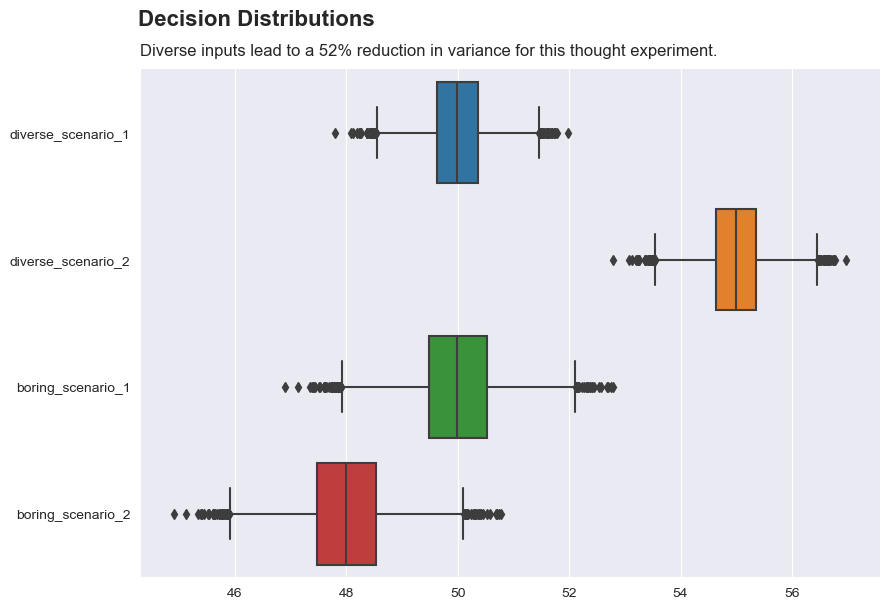

In [22]:
# plt.figure(figsize=(9, 5.6))
sns.catplot(data = decision_df, orient = 'h', kind = 'box', height = 5.6, aspect = 1.607)
plt.suptitle('Decision Distributions', x = .291, y = 1.08, fontsize=16, fontweight='bold')
plt.title('Diverse inputs lead to a 52% reduction in variance for this thought experiment.', fontsize=12, loc='left', pad=10)

plt.savefig('decision_box_plot.png', bbox_inches='tight', dpi=300)